# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | island harbour
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | kaa-khem
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | keetmanshoop
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | nabire
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | tongliao
Processing Record 23

Processing Record 40 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 41 of Set 4 | touros
Processing Record 42 of Set 4 | nyurba
Processing Record 43 of Set 4 | howrah
Processing Record 44 of Set 4 | avarua
Processing Record 45 of Set 4 | neryungri
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | arica
Processing Record 48 of Set 4 | gadzhiyevo
Processing Record 49 of Set 4 | sipalay
Processing Record 0 of Set 5 | byron bay
Processing Record 1 of Set 5 | tazovsky
Processing Record 2 of Set 5 | lospalos
Processing Record 3 of Set 5 | genhe
Processing Record 4 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 5 of Set 5 | santo antonio do ica
Processing Record 6 of Set 5 | cienfuegos
Processing Record 7 of Set 5 | saipan
Processing Record 8 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 9 of Set 5 | coron
Processing Record 10 of Set 5 | utrik
Processing Record 11 of Set 5 

Processing Record 28 of Set 8 | hayma'
City not found. Skipping...
Processing Record 29 of Set 8 | wuwei
Processing Record 30 of Set 8 | monte alegre
Processing Record 31 of Set 8 | patong
Processing Record 32 of Set 8 | new norfolk
Processing Record 33 of Set 8 | massawa
Processing Record 34 of Set 8 | selfoss
Processing Record 35 of Set 8 | independence
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | whyalla stuart
City not found. Skipping...
Processing Record 38 of Set 8 | musay'id
City not found. Skipping...
Processing Record 39 of Set 8 | sena madureira
Processing Record 40 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 41 of Set 8 | goondiwindi
Processing Record 42 of Set 8 | trinidad
Processing Record 43 of Set 8 | tefe
Processing Record 44 of Set 8 | jincheng
Processing Record 45 of Set 8 | palakollu
Processing Record 46 of Set 8 | lorengau
Processing Record 47 of Set 8 | behshahr
Processing Record 48 of Set 8 | callao
Processing 

Processing Record 12 of Set 12 | miracema do tocantins
Processing Record 13 of Set 12 | el hadjira
Processing Record 14 of Set 12 | ad dabbah
Processing Record 15 of Set 12 | la passe
-----------------------------
Data Retrieval Complete      
-----------------------------


In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          530
Lat           530
Lng           530
Max Temp      530
Humidity      530
Cloudiness    530
Wind Speed    530
Country       530
Date          530
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,87.78,74,40,10.36,CC,1704524533
1,namibe,-15.1961,12.1522,73.60,69,93,7.74,AO,1704524170
2,port-aux-francais,-49.3500,70.2167,44.53,87,100,37.45,TF,1704524534
3,tiksi,71.6872,128.8694,-27.49,99,55,7.92,RU,1704524367
4,island harbour,50.7240,-1.2758,42.22,92,15,5.01,GB,1704524213


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,87.78,74,40,10.36,CC,1704524533
1,namibe,-15.1961,12.1522,73.60,69,93,7.74,AO,1704524170
2,port-aux-francais,-49.3500,70.2167,44.53,87,100,37.45,TF,1704524534
3,tiksi,71.6872,128.8694,-27.49,99,55,7.92,RU,1704524367
4,island harbour,50.7240,-1.2758,42.22,92,15,5.01,GB,1704524213


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

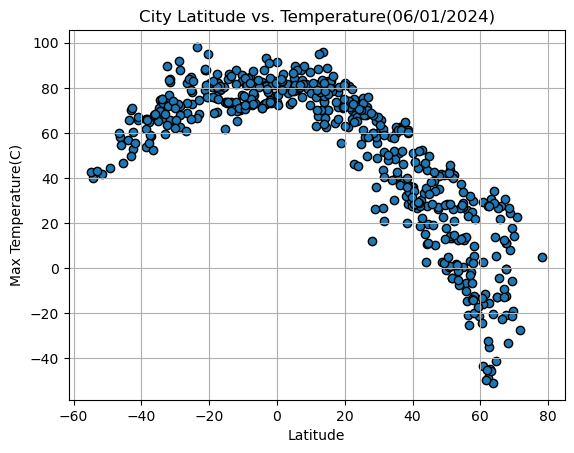

In [33]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs. Temperature(06/01/2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

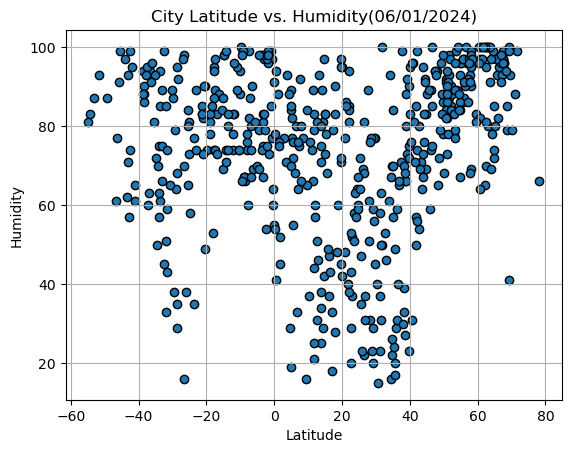

In [34]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity(06/01/2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

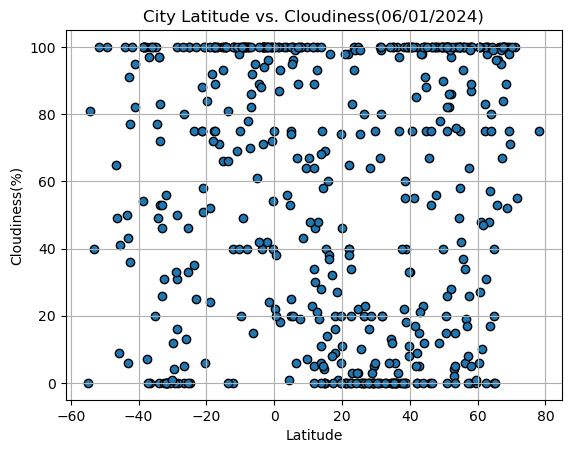

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness(06/01/2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

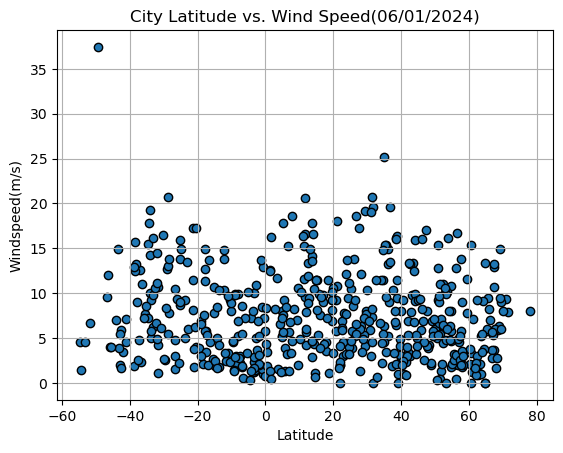

In [36]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Windspeed(m/s)')
plt.title('City Latitude vs. Wind Speed(06/01/2024)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [100]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    print(regress_values)
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,tiksi,71.6872,128.8694,-27.49,99,55,7.92,RU,1704524367
4,island harbour,50.7240,-1.2758,42.22,92,15,5.01,GB,1704524213
5,iqaluit,63.7506,-68.5145,-20.58,91,17,5.19,CA,1704524536
7,albany,42.6001,-73.9662,30.02,80,15,3.00,US,1704524538
8,bethel,41.3712,-73.4140,26.64,81,55,2.37,US,1704524539


In [102]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,87.78,74,40,10.36,CC,1704524533
1,namibe,-15.1961,12.1522,73.60,69,93,7.74,AO,1704524170
2,port-aux-francais,-49.3500,70.2167,44.53,87,100,37.45,TF,1704524534
6,necochea,-38.5473,-58.7368,66.36,90,100,15.70,AR,1704524537
11,puerto natales,-51.7236,-72.4875,41.85,93,100,6.71,CL,1704524541


###  Temperature vs. Latitude Linear Regression Plot

City_ID
3     -12.526204
4      19.485325
5      -0.406742
7      31.890800
8      33.767373
         ...    
524    28.310973
525    19.692849
527    47.140835
528    69.379649
529    27.378718
Name: Lat, Length: 354, dtype: float64
The r-squared is: -0.8812326986524668


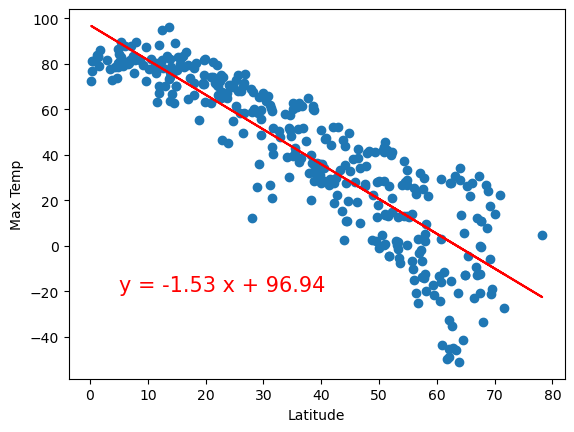

In [103]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (5,-20))

City_ID
0      78.027963
1      76.544128
2      59.869638
6      65.143692
11     58.710808
         ...    
514    74.044168
516    66.428824
519    83.101116
521    83.018119
526    79.294885
Name: Lat, Length: 176, dtype: float64
The r-squared is: 0.6482087620763484


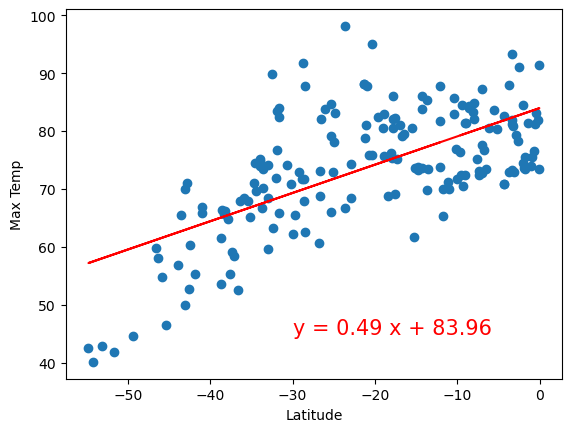

In [104]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,45))

**Discussion about the linear relationship: 
In the Northern Hemisphere there is a strong negative correlation for a city's latitude and temperature. So the higher the temperature, the lower the latitude.
In the SOuthern Hemisphere there is a fairly positive correlation between both avobe variables suggesting that a higher temperature would mean higher latitude.

### Humidity vs. Latitude Linear Regression Plot

City_ID
3      90.625084
4      79.302451
5      86.338371
7      74.914575
8      74.250822
         ...    
524    76.180777
525    79.229049
527    69.520564
528    61.654588
529    76.510520
Name: Lat, Length: 354, dtype: float64
The r-squared is: 0.46558359189282966


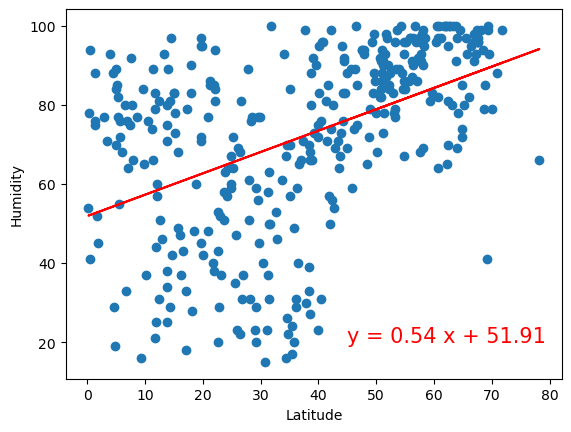

In [105]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (45,20))

City_ID
0      79.299484
1      78.947385
2      74.990698
6      76.242177
11     74.715719
         ...    
514    78.354170
516    76.547126
519    80.503292
521    80.483597
526    79.600111
Name: Lat, Length: 176, dtype: float64
The r-squared is: 0.10107123496807095


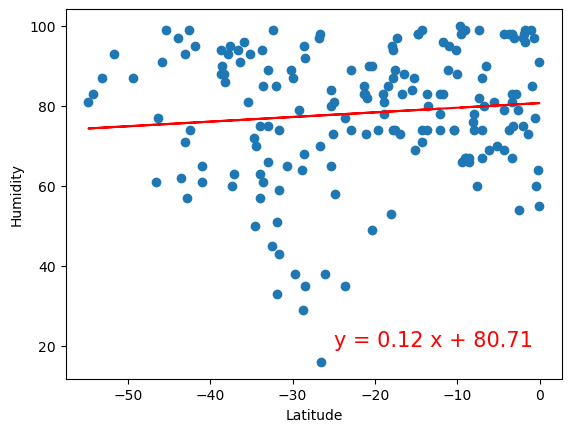

In [114]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (-25,20))

**Discussion about the linear relationship:
In the Northern Hemisphere there is a fair positive correlation for a city's latitude and humidity. A higher humidity suggest higher latitude in moderate amount.
In the Southern Hemisphere there is a very weak positive correlation between both above variables suggesting no favoruable relationship between both.

### Cloudiness vs. Latitude Linear Regression Plot

City_ID
3      68.811936
4      59.158862
5      65.157313
7      55.417992
8      54.852111
         ...    
524    56.497488
525    59.096283
527    50.819345
528    44.113232
529    56.778610
Name: Lat, Length: 354, dtype: float64
The r-squared is: 0.22334522455101388


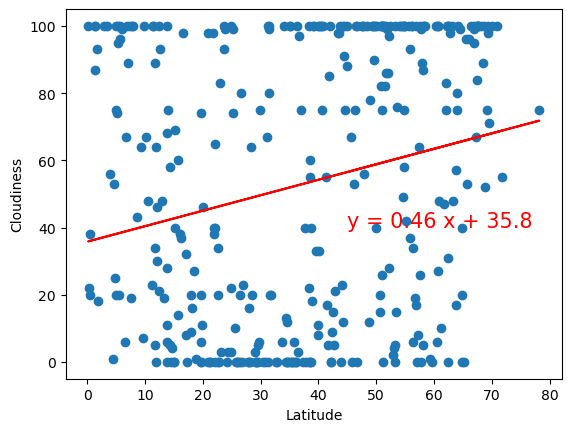

In [116]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (45,40))

City_ID
0      74.289480
1      71.805753
2      43.895069
6      52.723072
11     41.955355
         ...    
514    67.621181
516    54.874197
519    82.781204
521    82.642280
526    76.410123
Name: Lat, Length: 176, dtype: float64
The r-squared is: 0.31924995163148334


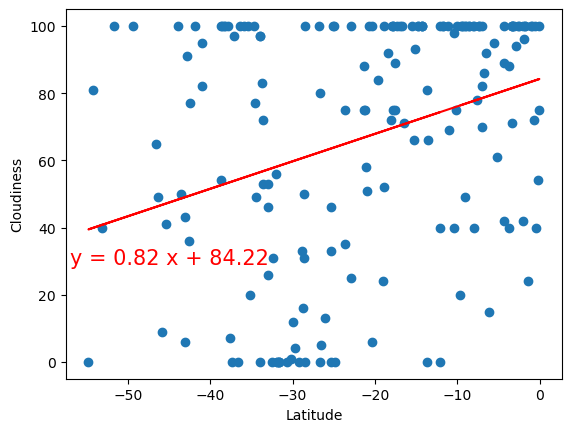

In [134]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-57,29))

**Discussion about the linear relationship:** 
In both the Northern and SOuthern Hemisphere there is a weak positive correlation for a city's latitude and cloudiness meaning that most points may not be explained by the regression line but in general as latitude increases the cloudiness also increases gradually. 

### Wind Speed vs. Latitude Linear Regression Plot

City_ID
3      5.723399
4      6.598904
5      6.054862
7      6.938189
8      6.989513
         ...   
524    6.840282
525    6.604579
527    7.355273
528    7.963497
529    6.814785
Name: Lat, Length: 354, dtype: float64
The r-squared is: -0.17321511130913914


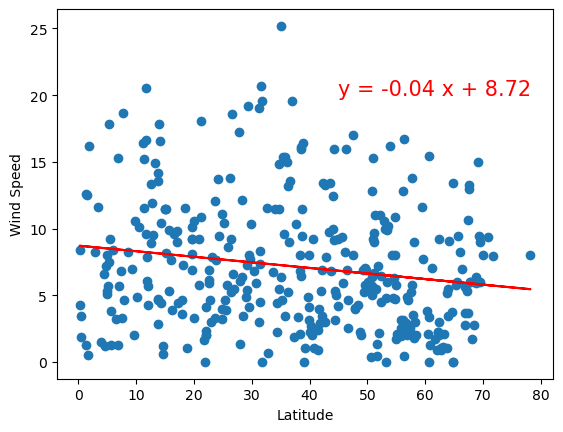

In [141]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Wind Speed', (45,20))

City_ID
0       6.221603
1       6.537710
2      10.089937
6       8.966386
11     10.336807
         ...    
514     7.070286
516     8.692610
519     5.140851
521     5.158532
526     5.951706
Name: Lat, Length: 176, dtype: float64
The r-squared is: -0.28568101405425345


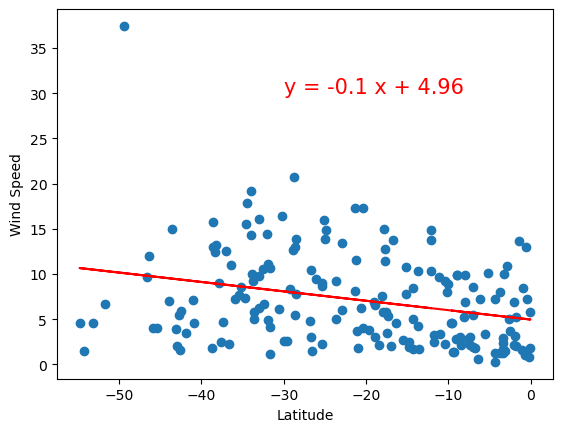

In [146]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** 
In both the Northern and Southern Hemisphere there is a weak negative correlation for a city's latitude and mindspeed meaning a city's windspeed decreases as latitiude increases but not by much. 